# Z-score


- a statistical measurement that describes a value's relationship to the mean of a group of values
- measured in terms of standard deviation from the mean

Why is Z-score important for traders?
- it reveals if a value is typical/atypical for a specificied data set
- in other words, traders can identify potential buy/sell opportunities

How to read Z-score?
- 0: the data point's score is identical to the mean score
- 1.0: the value is one standard deviation from the mean
- 3.0: the value is three standard deviation from the mean

From a trader's interpretation:
- a z-score significantly higher than 1.5 might indicate that the stock is overprice compared to its historical average, while a value lower than -1.5 might indicate the oppposite

Z-scores may be positive of negative
- negative: it is below the mean
- positive: it is above the mean

Formula:

$$ z = (x - \mu)/\sigma $$

Where
- $z$ = Z-score
- $x$ = the value being evaluated
- $\mu$ = the mean
- $\sigma$ = the standard deviation


Reference: https://www.investopedia.com/terms/z/zscore.asp#:~:text=Z%2Dscore%20is%20a%20statistical,traders%20to%20help%20determine%20volatility.

## Calculating z-score

Imagine you have the following data:

Where
- $x$ = 57
- $\mu$ = 52
- $\sigma$ = 4

In [1]:
x = 57
mean = 52
std = 4

z = (x - mean) / std
z

1.25

In [2]:
# The x-value is indeed 1.25 standard deviation from the mean.
1.25 * std

5.0

In [3]:
from scipy.stats import norm

# Multiply by 2 for two-tailed tests
p = norm.sf(abs(1.96)) * 2
p, p < 0.05

(0.04999579029644087, True)

In [4]:
p = norm.sf(abs(1.25)) * 2
p, p < 0.05

(0.2112995473337107, False)

## Plotting the Standard Normal Distribution (SND)

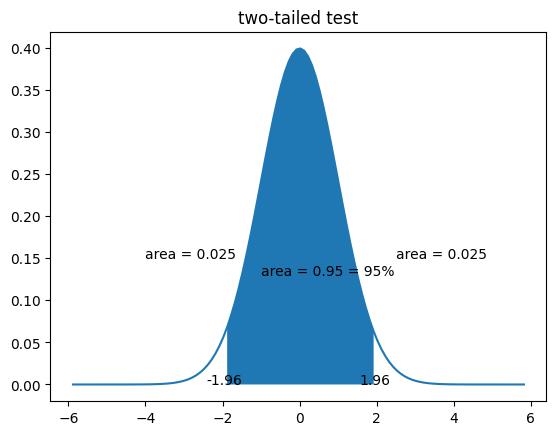

In [5]:
import numpy as np
from matplotlib.pyplot import subplots
from scipy.stats import norm

std_lim = 1.96  # 95% Confidence Interval (CI)

# Plot between -10 and 10 with 0.1 steps
X = np.arange(-std_lim * 3, std_lim * 3, 0.1)
ax = subplots()[1]
ax.set_title("two-tailed test")

# Mean and std of any SND is always 0 and 1 respectively.
mean = 0
std = 1
pdf = norm.pdf(X, mean, std)
ax.plot(X, pdf)

lo = mean - std_lim * std
hi = mean + std_lim * std

# ax.fill_between(X, pdf, where=(X > lo) & (X < hi))
ax.fill_between(X, pdf, where=(X <= norm.ppf(0.975)) & (X >= norm.ppf(0.025)))
ax.text(lo, 0, lo, ha="center")
ax.text(hi, 0, hi, ha="center")


ax.text(2.5, 0.15, "area = 0.025")
ax.text(-1, 0.13, "area = 0.95 = 95%")
ax.text(-4, 0.15, "area = 0.025");

In [6]:
norm.cdf(-1.96), norm.cdf(1.96)

(0.024997895148220435, 0.9750021048517795)

In [7]:
norm.ppf(0.025), norm.ppf(0.975)

(-1.9599639845400545, 1.959963984540054)

In [8]:
norm.sf(abs(-1.96)) * 2  # For two-tailed test

0.04999579029644087

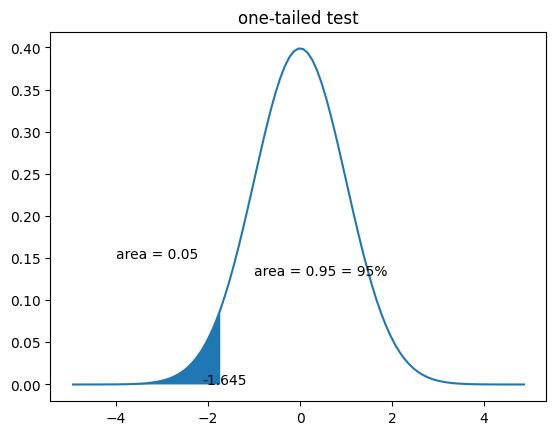

In [9]:
import numpy as np
from matplotlib.pyplot import subplots
from scipy.stats import norm

std_lim = 1.645  # 90% Confidence Interval (CI)

# Plot between -10 and 10 with 0.1 steps
X = np.arange(-std_lim * 3, std_lim * 3, 0.1)
ax = subplots()[1]
ax.set_title("one-tailed test")

# Mean and std of any SND is always 0 and 1 respectively.
mean = 0
std = 1
pdf = norm.pdf(X, mean, std)
ax.plot(X, pdf)

lo = mean - std_lim * std
hi = mean + std_lim * std

# ax.fill_between(X, pdf, where=(X > lo) & (X < hi))
ax.fill_between(X, pdf, where=(X < norm.ppf(0.05)))
ax.text(lo, 0, lo, ha="center")


ax.text(-1, 0.13, "area = 0.95 = 95%")
ax.text(-4, 0.15, "area = 0.05");

Observation:
- the probability of randomly selecting a score between -1.96 and +1.96 standard deviations from the mean is 95%.
- if there is less than a 5% chance of a raw score being selected randomly, then this is a statistically significant result

the two-tailed test shows evidence that the control and variation are different, but the one-tailed test shows evidence if variation is better than the control.

According to a unit normal table, the values for a z-score of 1.64 are 0.9495, 0.0505, and 0.4495. The values for a z-score of 2.48 are 0.9934, 0.0066, and 0.4934. 

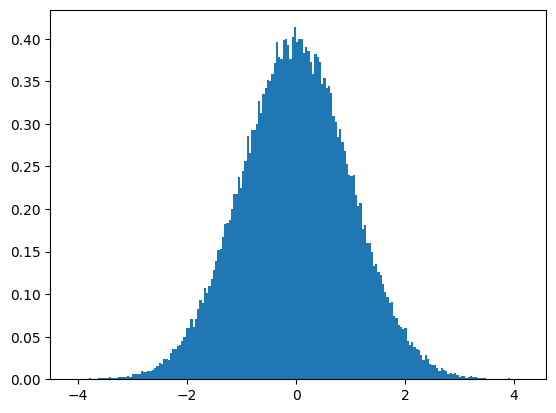

In [10]:
vals = np.random.standard_normal(100000)
ax = subplots()[1]
ax.hist(vals, bins=200, density=True);

## Finding z-score and p-value using scipy

In [11]:
import scipy.stats as st

# Compute the p-value for a z-score
st.norm.cdf(-1.741)

0.04084178926110882

In [12]:
st.norm.cdf(-1.64)

0.050502583474103704

In [13]:
# Some common z-scores
[st.norm.cdf(-3), st.norm.cdf(-1), st.norm.cdf(0), st.norm.cdf(1), st.norm.cdf(2)]

[0.001349898031630093,
 0.15865525393145707,
 0.5,
 0.8413447460685429,
 0.9772498680518208]

The `norm.cdf()` function gives the **cumulative probability (left tail)** from `-3` to `3` approx. To get the right tailed distribution, subtract this value from 1.

### Finding z-score from a p-value

In [14]:
# Find z-score for a probability of 0.97 (2sd)
st.norm.ppf(0.97)

1.8807936081512506

In [15]:
st.norm.ppf(0.05), st.norm.ppf(0.95)

(-1.6448536269514729, 1.644853626951472)

In [16]:
[st.norm.ppf(0.95), st.norm.ppf(0.97), st.norm.ppf(0.98), st.norm.ppf(0.99)]

[1.644853626951472, 1.8807936081512506, 2.0537489106318225, 2.3263478740408408]

## Power analysis

In [17]:
import math

from statsmodels.stats.power import TTestIndPower

# calculation of effect size
# size of samples in pilot study
n1, n2 = 40, 4

# variance of samples in pilot study
s1, s2 = 5**2, 5**2

# calculate the pooled standard deviation
# (Cohen's d)
s = math.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

# means of the samples
u1, u2 = 90, 85

# calculate the effect size
d = (u1 - u2) / s
print(f"Effect size: {d}")

# factors for power analysis
alpha = 0.05
power = 0.8

# perform power analysis to find sample size
# for given effect
obj = TTestIndPower()
n = obj.solve_power(
    effect_size=d, alpha=alpha, power=power, ratio=1, alternative="two-sided"
)

print("Sample size/Number needed in each group: {:.3f}".format(math.ceil(n)))

Effect size: 1.0
Sample size/Number needed in each group: 17.000


In [18]:
def sample_size(a, b):
    from statsmodels.stats.power import TTestIndPower, TTestPower

    # calculation of effect size
    # size of samples in pilot study
    n1, n2 = len(a), len(b)

    # variance of samples in pilot study
    s1, s2 = a.var(), b.var()

    # calculate the pooled standard deviation
    # (Cohen's d)
    s = math.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

    # means of the samples
    u1, u2 = a.mean(), b.mean()

    # calculate the effect size
    d = (u1 - u2) / s
    print(f"Effect size: {d}")

    # factors for power analysis
    alpha = 0.05
    power = 0.8

    # perform power analysis to find sample size
    # for given effect
    obj = TTestIndPower()
    n = obj.solve_power(
        effect_size=d, alpha=alpha, power=power, ratio=1, alternative="two-sided"
    )
    n = int(math.ceil(n))
    print("Sample size/Number needed in each group: {:.3f}".format(n))
    return n

Finding sample size with estimate effect size (when the variance is unknown)

In [19]:
from statsmodels.stats.power import TTestIndPower, TTestPower

obj = TTestIndPower()
n = obj.solve_power(effect_size=1, alpha=0.05, power=0.8)
n

16.714722572276173